In [6]:
import sys

sys.path.append('/Users/huberyhu/Desktop/SURP/im_deinfluence/model_code')

import networkx as nx
import experiment_framework as ef
import matplotlib.pyplot as plt
import copy

In [7]:
G = nx.barabasi_albert_graph(2000, 2)
model = ef.run_influence_cascade(G, num_influencers=20, steps=3, selection_method='random')

In [8]:
# Evaluate the influence and deinfluence
num_influenced = model.evaluate_influence()
num_deinfluenced = model.evaluate_deinfluence()
num_susceptible = model.evaluate_susceptible()

# Create a deep copy of the model
model_fixed_influencers = copy.deepcopy(model)

# Evaluate the influence and deinfluence
num_influenced = model_fixed_influencers.evaluate_influence()
num_deinfluenced = model_fixed_influencers.evaluate_deinfluence()
num_susceptible = model_fixed_influencers.evaluate_susceptible()

print(f"Number of influenced nodes: {num_influenced}")
print(f"Number of deinfluenced nodes: {num_deinfluenced}")
print(f"Number of susceptible nodes: {num_susceptible}")
print('influencer', model.selected_influencers)

Number of influenced nodes: 719
Number of deinfluenced nodes: 0
Number of susceptible nodes: 1281
influencer {1669, 648, 394, 1035, 273, 545, 1319, 1198, 1327, 1338, 59, 1085, 965, 975, 601, 1626, 481, 226, 244, 249}


In [9]:
# Run simulation for different values of k
budget_list = list(range(1, 201))
deinfluencers_list = ef.select_deinfluencers_budget(budget_list, model_fixed_influencers,'budget_linear')
results = ef.average_results_simple(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=3)

print(deinfluencers_list)

[(1, {'Random': set(), 'High Degree': set(), 'Low Degree': set()}), (2, {'Random': {1941}, 'High Degree': {116}, 'Low Degree': {116}}), (3, {'Random': {293}, 'High Degree': {41}, 'Low Degree': {116}}), (4, {'Random': {1385, 1367}, 'High Degree': {47}, 'Low Degree': {129, 116}}), (5, {'Random': {858, 1342}, 'High Degree': {44}, 'Low Degree': {129, 116}}), (6, {'Random': {450, 1435}, 'High Degree': {23}, 'Low Degree': {129, 130, 116}}), (7, {'Random': {1048, 290}, 'High Degree': {38}, 'Low Degree': {129, 130, 116}}), (8, {'Random': {1842, 1813, 1221}, 'High Degree': {48}, 'Low Degree': {129, 130, 116, 138}}), (9, {'Random': {1865, 522, 995, 1701}, 'High Degree': {28}, 'Low Degree': {129, 130, 116, 138}}), (10, {'Random': {1968, 892, 1244}, 'High Degree': {16}, 'Low Degree': {129, 130, 138, 140, 116}}), (11, {'Random': {1528, 1649, 1402, 315}, 'High Degree': {7}, 'Low Degree': {129, 130, 138, 140, 116}}), (12, {'Random': {645, 1810, 1270, 952, 476}, 'High Degree': {39}, 'Low Degree': {129

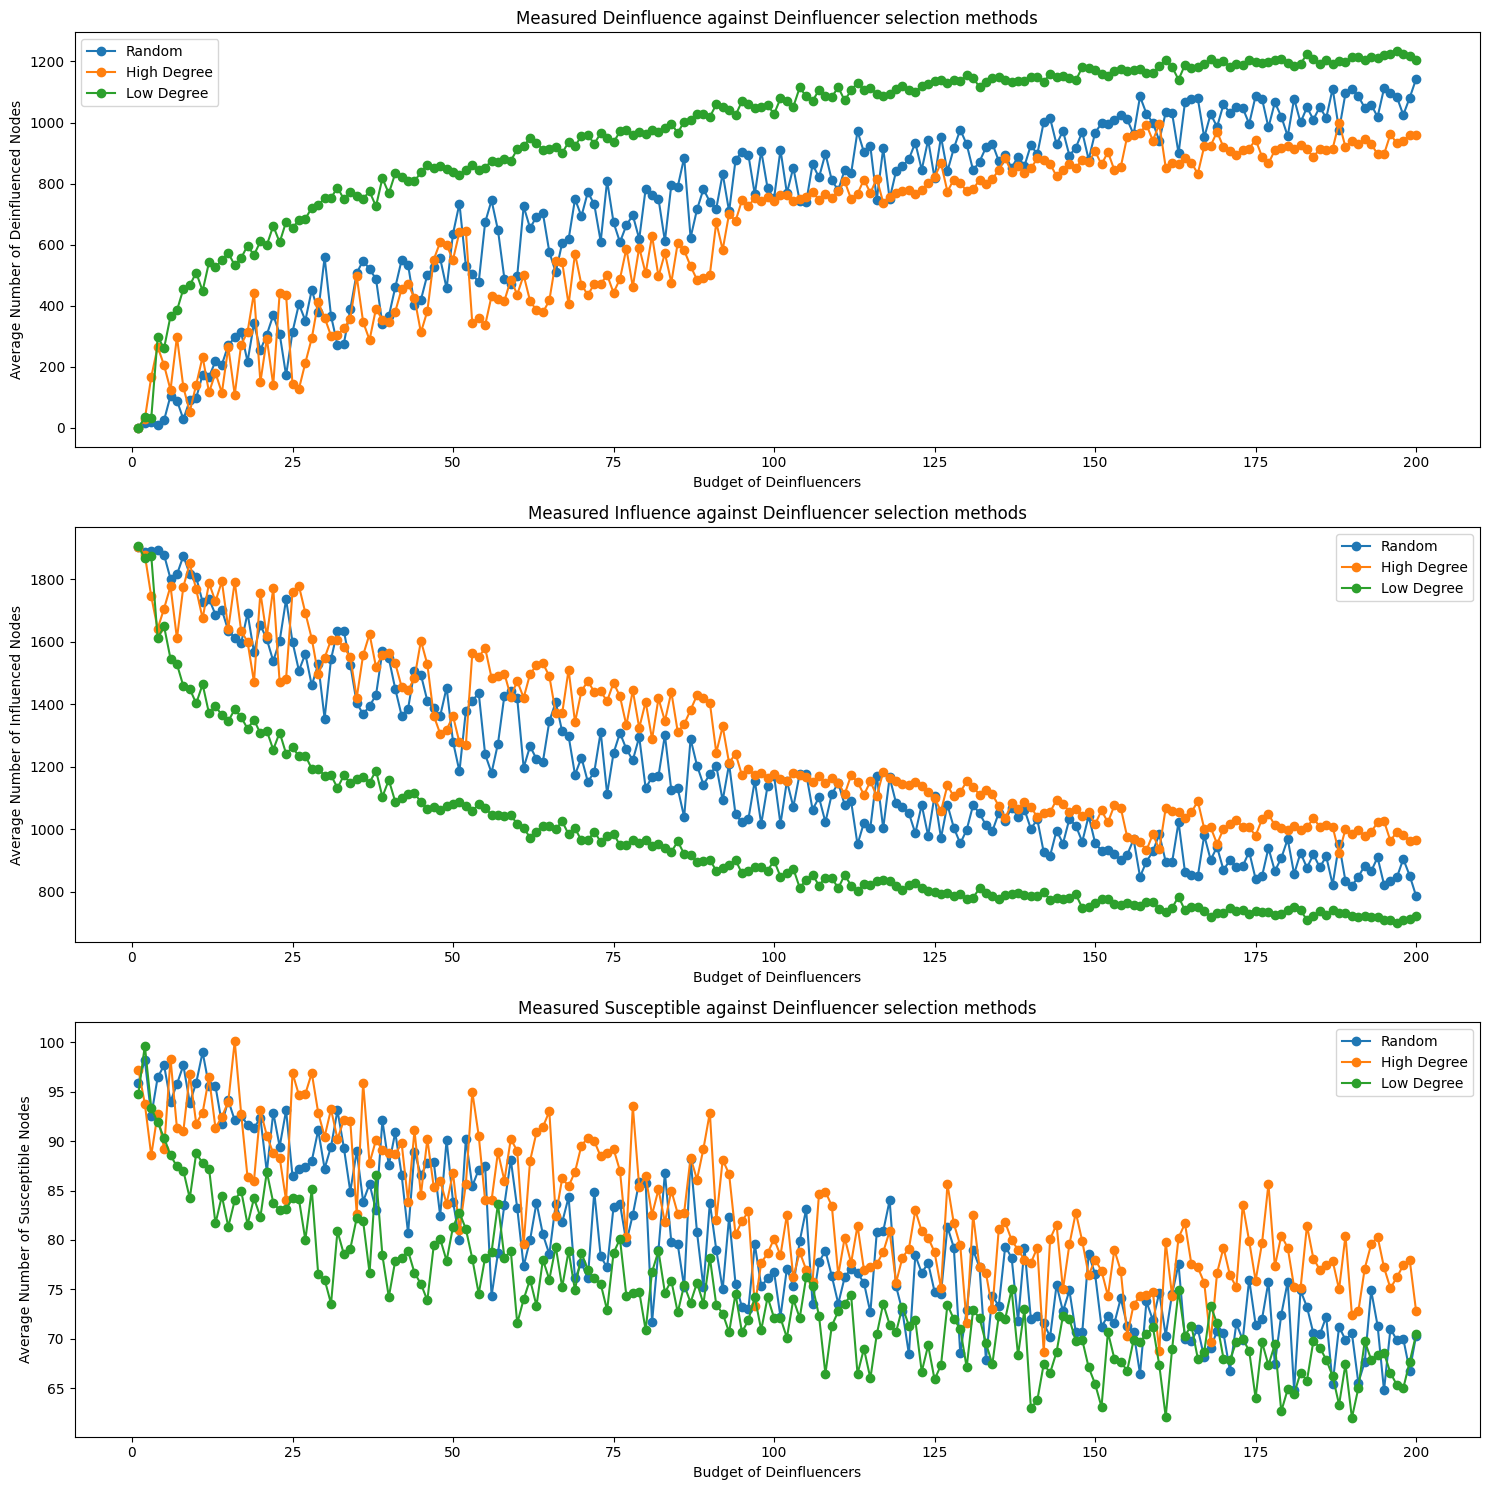

In [5]:

# Plotting results
fig, axs = plt.subplots(3, figsize=(15, 15))
# Set titles for individual subplots
axs[0].set_title('Effectiveness of Deinfluencers by Selection Method and Quantity')
axs[1].set_title('Influence Reduction by Deinfluencer Selection Method and Quantity')
axs[2].set_title('Remaining Susceptible Nodes by Deinfluencer Selection Method and Quantity')

# Create line plots
methods = results[next(iter(results))].keys()  # Get all methods from the first key
k_values = sorted(results.keys())  # Sort k values for plotting
total_nodes = len(G.nodes)

for method in methods:
    deinfluenced_nodes = [results[k][method][0] for k in k_values]
    influenced_nodes = [results[k][method][1] for k in k_values]
    susceptible_nodes = [total_nodes - (influenced + deinfluenced) for influenced, deinfluenced in zip(influenced_nodes, deinfluenced_nodes)]

    axs[0].plot(k_values, deinfluenced_nodes, label=method, marker="o")
    axs[1].plot(k_values, influenced_nodes, label=method, marker="o")
    axs[2].plot(k_values, susceptible_nodes, label=method, marker="o")

axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[0].set_xlabel('Number of Deinfluencers')
axs[0].set_ylabel('Average Number of Final Deinfluenced Nodes')

axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[1].set_xlabel('Number of Deinfluencers')
axs[1].set_ylabel('Average Number of Final Influenced Nodes')

axs[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[2].set_xlabel('Number of Deinfluencers')
axs[2].set_ylabel('Average Number of Final Susceptible Nodes')

plt.tight_layout()
plt.show()